# Segmenting and Clustering Neighbourhoods in Toronto

# Part 1 Instructions

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

##### Steps:

1. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown in the assignment.

2. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

   a) Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
 
   b) If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

   c) More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.


3. In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

from sklearn import metrics
from scipy.spatial.distance import cdist

1) Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown in the assignment.



In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# Make a GET request to fetch the raw HTML content
page = requests.get(url)

# Check the http response status code
print("The Page Status Code is", page.status_code) # This should print 200


The Page Status Code is 200


In [3]:
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

Find the table in the Wiki page

In [4]:
wiki_table = soup.find('table', class_='wikitable sortable')

Identify the Column Headers

In [5]:
column_headers_raw = [th.getText() for th in 
                  wiki_table.findAll('tr', limit=2)[0].findAll('th')]

column_headers = [s.rstrip() for s in column_headers_raw] 

print (column_headers)

['Postcode', 'Borough', 'Neighborhood']


Find all of the rows in the table and skip the first column header row.

In [6]:
# Create an empty list to populate
row_list = []

table_rows = wiki_table.find_all('tr')[1:]

for tr in table_rows:
    td = tr.find_all('td')
    raw_row = [i.text for i in td]
    row = [s.rstrip() for s in raw_row] # Strip out the \n characters
    row_list.append(row)
    print(row)

['M1A', 'Not assigned', 'Not assigned']
['M2A', 'Not assigned', 'Not assigned']
['M3A', 'North York', 'Parkwoods']
['M4A', 'North York', 'Victoria Village']
['M5A', 'Downtown Toronto', 'Harbourfront']
['M6A', 'North York', 'Lawrence Heights']
['M6A', 'North York', 'Lawrence Manor']
['M7A', 'Downtown Toronto', "Queen's Park"]
['M8A', 'Not assigned', 'Not assigned']
['M9A', "Queen's Park", 'Not assigned']
['M1B', 'Scarborough', 'Rouge']
['M1B', 'Scarborough', 'Malvern']
['M2B', 'Not assigned', 'Not assigned']
['M3B', 'North York', 'Don Mills North']
['M4B', 'East York', 'Woodbine Gardens']
['M4B', 'East York', 'Parkview Hill']
['M5B', 'Downtown Toronto', 'Ryerson']
['M5B', 'Downtown Toronto', 'Garden District']
['M6B', 'North York', 'Glencairn']
['M7B', 'Not assigned', 'Not assigned']
['M8B', 'Not assigned', 'Not assigned']
['M9B', 'Etobicoke', 'Cloverdale']
['M9B', 'Etobicoke', 'Islington']
['M9B', 'Etobicoke', 'Martin Grove']
['M9B', 'Etobicoke', 'Princess Gardens']
['M9B', 'Etobicoke'

2) The dataframe will consist of three columns: **PostalCode**, **Borough**, and **Neighborhood**.

In [7]:
postal_df = pd.DataFrame(row_list, columns=column_headers)
postal_df.head() 

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


2a) Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [8]:
postal_df = postal_df[postal_df.Borough != 'Not assigned'] 

2b) If a cell has a **Borough** but a 'Not assigned' **neighborhood**, then the neighborhood will be the same as the borough.

In [9]:
# postal_df['Neighborhood'].loc[postal_df['Neighborhood'] == 'Not assigned'] = postal_df.Borough ## Alternative code to use
postal_df['Neighborhood'].replace("Not assigned", postal_df["Borough"], inplace=True)

postal_df.head(7)

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Queen's Park


2c) More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma

In [10]:
postal_df["Neighborhood"] = postal_df.groupby("Postcode")["Neighborhood"].transform(lambda x: ', '.join(x))
postal_df.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,"Lawrence Heights, Lawrence Manor"
6,M6A,North York,"Lawrence Heights, Lawrence Manor"


In [11]:
# Drop the duplicate values 
postal_df.drop_duplicates(keep='first',inplace=True) 

In [12]:
# Reset the Index
postal_df = postal_df.reset_index(drop=True)
postal_df

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
101,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."


3. In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [13]:
postal_df.shape

(103, 3)

# Part 2 Instructions

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

Note that Geocoder is not working for me. This is the suggestion of how to use GeoCoder from StackExchange
https://stackoverflow.com/questions/52450422/how-to-get-coordinates-from-postal-codes-and-add-them-into-df-using-a-loop/52450556

1) Read the provided Geo Spatial CSV file from http://cocl.us/Geospatial_data

In [14]:
url = 'http://cocl.us/Geospatial_data'
geospatial_df = pd.read_csv(url)
geospatial_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


2) In the postal_df data frame, rename "Postcode" to "Postal Code" in order to perform the join between the two dataframess

In [15]:
postal_df.rename(columns = {'Postcode':'Postal Code'}, inplace = True)

3) Perform the inner join and store the result in a new dataframe

In [16]:
df_result = pd.merge(postal_df, geospatial_df, on='Postal Code', how='inner')

In [17]:
df_result

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509


# Part 3 Instructions

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure to 

a) Add enough Markdown cells to explain what you decided to do 

b) Report any observations you make and to generate maps to visualize your neighborhoods and how they cluster together. 

For part 3, I am following the "Segmenting and Clustering Neighborhoods in New York City" lab.

Import the necessary libraries used in the Lab.

In [18]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: \ 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::certifi-2019.9.11-py37_0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::ca-certificates-2019.8.28-0, anaconda::certifi-2019.9.11-py37_0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2, defaults::certifi-2019.9.11-py37_0
  - anaconda::ca-certificates-2019.8.28-0, defaults::certifi-2019.9.11-py37_0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0, defaults::certifi-2019.9.11-py37_0
  - defaults::ca-certificates-2019.8.28-0, defaults::certifi-2019.9.11-py37_0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::certifi-2019.9.11-py37_0, anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - anaconda::certifi-2019.9.11-py37_0, defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Librarie

Use the geopy library to get the latitude and longitude values of Toronto. **toronto_explorer** is used as the user_agent to define an instance of the geocoder.

In [19]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON are 43.653963, -79.387207.


Create a map of Toronto using latitude and longitude values

In [20]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

Explore and cluster the neighborhoods in Toronto by working with only boroughs that contain the word Toronto and then replicate the same analysis performed in the lab to the New York City data.

In [21]:
toronto_subset_df = df_result[df_result['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_subset_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


Add markers to the map above using the subset of Toronto Boroughs.

In [22]:
for lat, lng, borough, neighborhood in zip(toronto_subset_df['Latitude'], toronto_subset_df['Longitude'], \
                                           toronto_subset_df['Borough'], toronto_subset_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Use the Foursquare API to explore the neighborhoods and segment them.

In [41]:
CLIENT_ID = 'My Client ID' # your Foursquare ID
CLIENT_SECRET = 'My Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: My Client ID
CLIENT_SECRET:My Foursquare Secret


Explore the first neighborhood in the dataframe.

In [24]:
toronto_subset_df.loc[0, 'Neighborhood']

'Harbourfront'

Get the neighborhood's latitude and longitude values.

In [25]:
neighborhood_latitude = toronto_subset_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_subset_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_subset_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbourfront are 43.6542599, -79.3606359.


Get the 50 venues that are in Harbourfont within a radius of 500 meters.

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

toronto_venues = getNearbyVenues(names=toronto_subset_df['Neighborhood'],
                                   latitudes=toronto_subset_df['Latitude'],
                                   longitudes=toronto_subset_df['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

Check the size of the resulting dataframe

In [28]:
print(toronto_venues.shape)
toronto_venues.head()

(1202, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653191,-79.357947,Gym / Fitness Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Check how many venues were returned for each neighborhood

In [29]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",50,50,50,50,50,50
Berczy Park,50,50,50,50,50,50
"Brockton, Exhibition Place, Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",44,44,44,44,44,44
Central Bay Street,50,50,50,50,50,50
"Chinatown, Grange Park, Kensington Market",50,50,50,50,50,50
Christie,18,18,18,18,18,18


Identify how many unique categories can be curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 214 uniques categories.


Analyze Each Neighborhood

In [31]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adelaide, King, Richmond",0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.020000,0.000000,0.00,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.0000,0.000000,0.0000,0.000000,0.02,0.020000,0.000000,0.00000,0.020000,0.020000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.060000,0.000000,0.000000,0.000000,0.00,0.02,0.000000,0.000000,0.02,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.02,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.040000,0.00000,0.000000,0.02,0.000000,0.02,0.000000,0.020000,0.000000,0.000000,0.020000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.040000,0.00,0.00,0.00,0.000000,0.00

Print each neighborhood along with the top 5 most common venues

In [33]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0              Café  0.06
1        Steakhouse  0.06
2       Coffee Shop  0.06
3  Asian Restaurant  0.06
4               Bar  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.10
1  Cocktail Bar  0.06
2    Steakhouse  0.04
3      Beer Bar  0.04
4          Café  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.10
2     Coffee Shop  0.10
3      Restaurant  0.05
4   Burrito Place  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1                 Spa  0.06
2       Auto Workshop  0.06
3                Park  0.06
4          Restaurant  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
             venue  freq
0  Airport Service  0.19
1            Plane  0.06
2         Boutique  0.06
3            

Write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Steakhouse,Café,Asian Restaurant,Bar
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Café
2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Restaurant,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Skate Park,Fast Food Restaurant,Farmers Market,Butcher
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Boat or Ferry,Coffee Shop,Boutique,Rental Car Location


For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. Plot of sum of squared distances for k. If the plot looks like an arm, then the elbow on the arm is optimal k.  (From: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

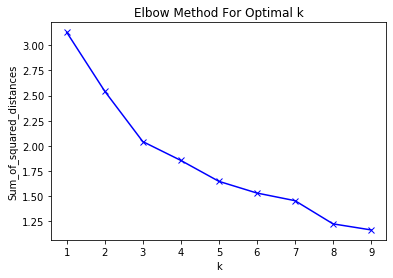

In [37]:
toronto_grouped_clustering =toronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
    
# Plot the elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Run *k*-means to cluster the neighborhood into 5 clusters.

In [38]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
# add clustering labels
#neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace = True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_subset_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Park,Gym,Wings Joint,Fried Chicken Joint
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Café,Ramen Restaurant,Clothing Store,Theater
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Café,Coffee Shop,Park,Gastropub
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Trail,Health Food Store,Pub,Wings Joint,Cuban Restaurant


Visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], \
                                  toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters